In [2]:
%matplotlib inline
import numpy as np

### C-Space Overview
- C: set of all possible robot configs where dim(C) = min DOF 
- Work Space W: 2D or 3D eucledian sapce where robot operates
- free space $c_{free} \subseteq C$ is set of all free configs
--free space $c_{obs} \subseteq C$ is set of all configs in which either the robot collides with itself or an obstacle

## Computing $C_{obs}$
- Let $R(x,y)$ be the set of robot verticies relative to the reference point x,y
- $C_{obs}$ of obstacle P and Robot R = $P \bigoplus -R(0,0)$ where $\bigoplus$ denotes a Minkowski sum

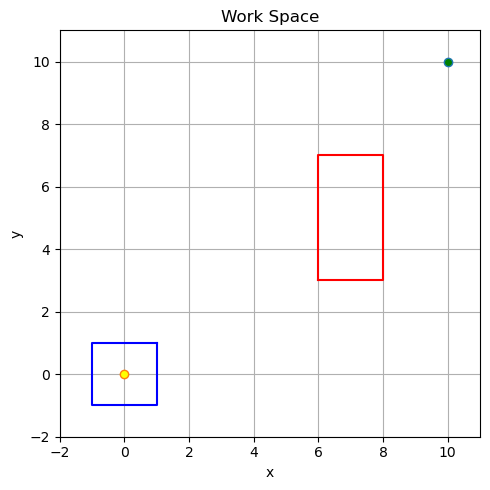

In [34]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

robot = Polygon([(1, 1),
   (-1, 1),
   (-1, -1),
   (1, -1),
])

obstacle = Polygon([(6, 3),
   (6, 7),
   (8, 7),
   (8, 3),
])

rx, ry = robot.exterior.xy
ox, oy = obstacle.exterior.xy
goal = [[10],[10]]
start = [[0],[0]]
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(ox,oy,c="red")
ax.plot(rx,ry,c="blue")
ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")
ax.plot(start[0],start[1],marker="o",markerfacecolor="yellow")

ax.set_title("Work Space")
ax.set_xlim([-2,11])
ax.set_ylim([-2,11])
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.grid()


In [123]:
import operator 
from shapely.geometry import Point

def compute_c_obs(R_0,P):
    c_obs_coords = [set()] * len(P)
    for i in range(len(P)):
        for p_coord in P[i].exterior.coords:
            for coord in R_0.exterior.coords:
                coord = tuple(i * -1 for i in coord)
                pt = tuple(map(operator.add,p_coord,coord))
                if not Point(pt).within(P[i]):
                    c_obs_coords[i].add(pt)
    return c_obs_coords
            
P_ = [obstacle]
r_0 = robot

c_obs_cords = compute_c_obs(r_0,P_)[0]

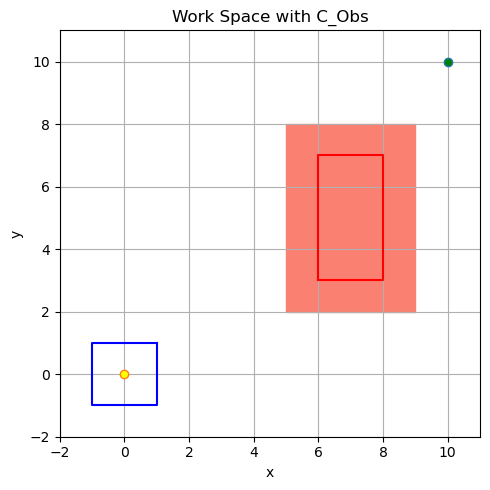

In [130]:
from shapely.geometry import Point, Polygon,MultiPoint
import matplotlib.pyplot as plt

robot = Polygon([(1, 1),
   (-1, 1),
   (-1, -1),
   (1, -1),
])

obstacle = Polygon([(6, 3),
   (6, 7),
   (8, 7),
   (8, 3),
])

c_obs = MultiPoint(list(c_obs_cords)).convex_hull


goal = [[10],[10]]
start = [[0],[0]]

fig,ax = plt.subplots(figsize=(5,5))
ax.plot(*obstacle.exterior.xy,c="red")
ax.fill(*c_obs.exterior.xy,c="salmon")
ax.plot(*robot.exterior.xy,c="blue")

ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")
ax.plot(start[0],start[1],marker="o",markerfacecolor="yellow")

ax.set_title("Work Space with C_Obs")
ax.set_xlim([-2,11])
ax.set_ylim([-2,11])
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.grid()

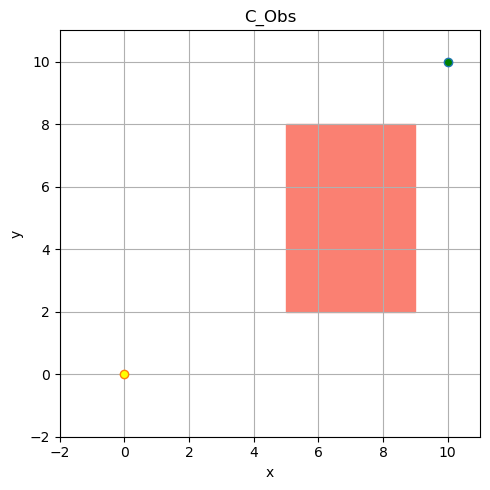

In [127]:
from shapely.geometry import Point, Polygon,MultiPoint
import matplotlib.pyplot as plt

c_obs = MultiPoint(list(c_obs_cords)).convex_hull


goal = [[10],[10]]
start = [[0],[0]]

fig,ax = plt.subplots(figsize=(5,5))
ax.fill(*c_obs.exterior.xy,c="salmon")

ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")
ax.plot(start[0],start[1],marker="o",markerfacecolor="yellow")

ax.set_title("C_Obs")
ax.set_xlim([-2,11])
ax.set_ylim([-2,11])
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.grid()